In [1]:
!pip install opencv-python

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.filters.thresholding import threshold_otsu, threshold_local
import cv2

2.1.1

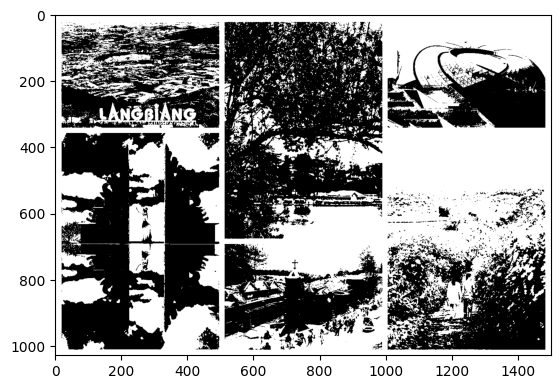

In [3]:
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)
thres = threshold_otsu(a)
b = a > thres
b = Image.fromarray(b)
plt.imshow(b)
plt.show()

2.1.2

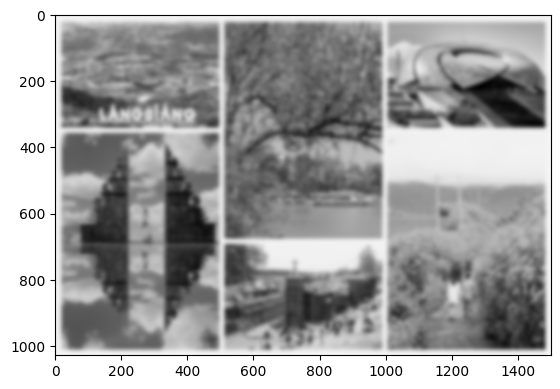

In [4]:
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow(b)


2.2

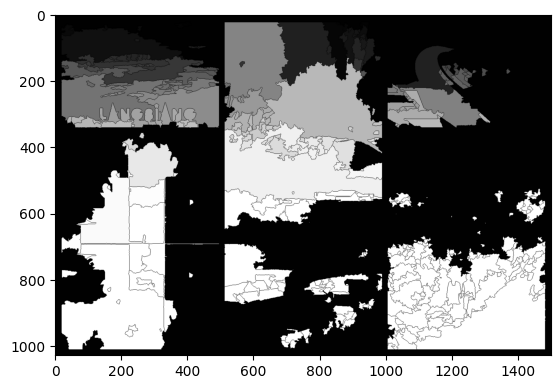

In [5]:
data = cv2.imread('exercise/dalat.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thres, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
b2 = cv2.erode(b1, None, iterations=2)
dist_trans = cv2.distanceTransform(b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
labeled, ncc = nd.label(dt)
labeled = labeled.astype(np.int32)
cv2.watershed(data, labeled)
b = Image.fromarray(labeled)
plt.imshow(b)
plt.show()

2.3.1

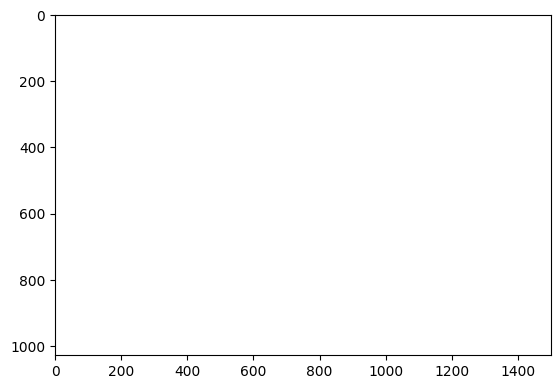

In [6]:
data = Image.open('exercise/dalat.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

2.3.2

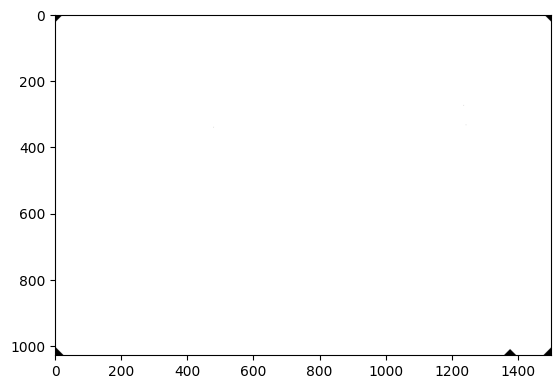

In [7]:
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_opening(data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

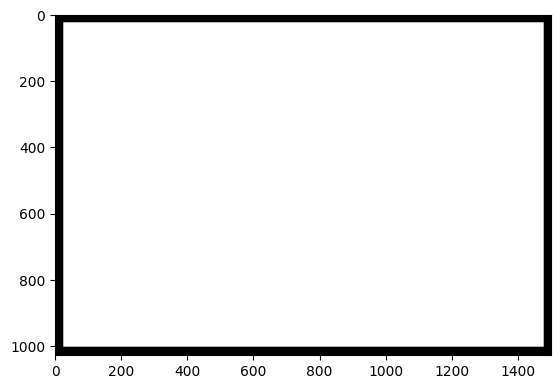

In [8]:
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_closing(data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

Bài tập 1